In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2001)

In [ ]:
def eucl_dist(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

In [ ]:
def create_field(count):
    X = np.random.random((count, 2))
    plt.scatter(X[:, 0], X[:, 1])
    plt.show()
    return X

In [ ]:
def elbow(field):
    results = []
    for i in range(1, 11):
        centroids = init_centroids(field, i)
        results.append(run_kmeans(i, field, centroids, False))
    plt.plot(results)
    plt.show()
    optimal = 1
    min = results[0]
    for i in range(1, len(results)-1):
        dk = abs(results[i]-results[i+1])/abs(results[i-1]-results[i])
        if min > dk:
            min = dk
            optimal = i+1
    return optimal

In [ ]:
def run_kmeans(cluster_count, field, centroids, show):
    distances = np.zeros((len(field), cluster_count))
    closest = np.zeros(len(field)).astype(int)
    fig_cnt = 1
    while True:

        old_closest = closest.copy()

        for i in range(cluster_count):
            distances[:, i] = ((field - centroids[i]) ** 2).sum(axis=1) ** 0.5

        closest = np.argmin(distances, axis=1)

        for i in range(cluster_count):
            centroids[i, :] = field[closest == i].mean(axis=0)
        if show:
            plt.figure(fig_cnt)
            plt.scatter(field[:, 0], field[:, 1], c=closest)
            plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r')
        fig_cnt += 1
        if all(closest == old_closest):
            break
    if show:
        plt.show()
    distances = distances ** 2
    return distances.min(axis=1).sum()

In [ ]:
def init_centroids(points, count):
    centers = points[np.random.choice(len(points), count, replace=False)]
    return centers     

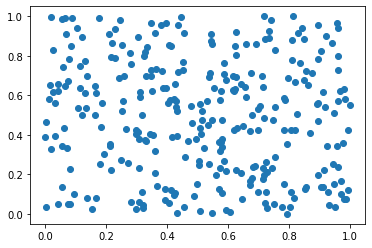

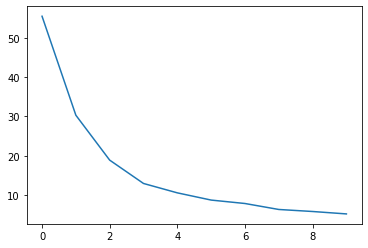

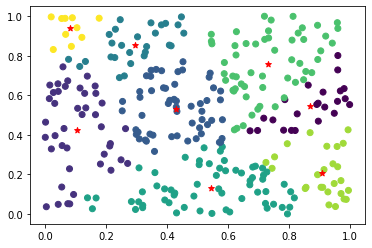

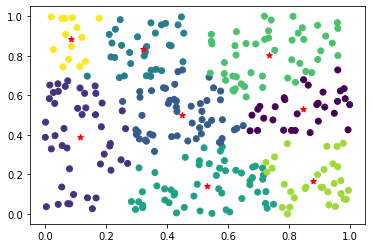

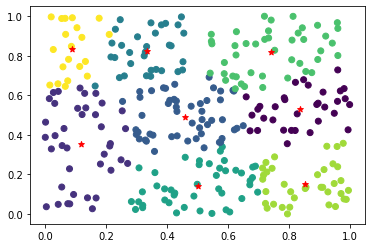

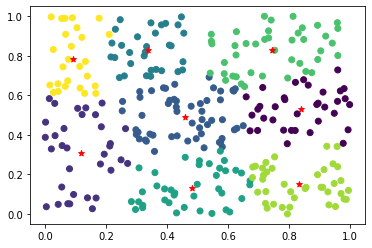

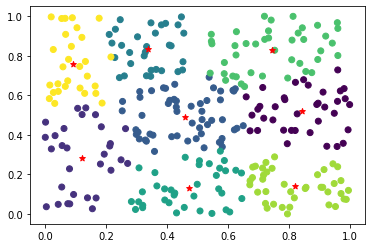

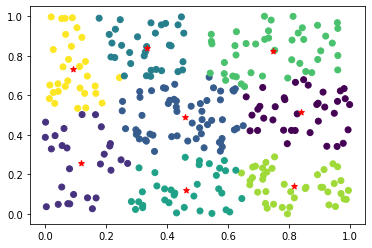

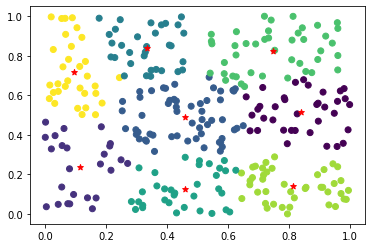

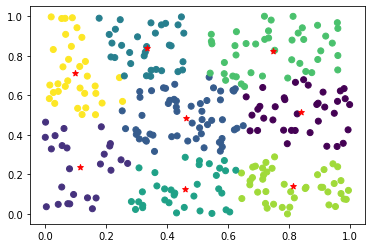

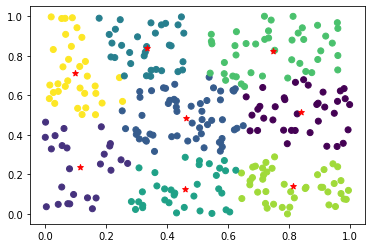

In [ ]:
if __name__ == '__main__':
    field = create_field(300)
    opt = elbow(field)
    centers = init_centroids(field, opt)
    kmeans = run_kmeans(opt,field, centers, True)